Dear reader,

In my notebook, I am faking an aquaplanet with a domain of  10S-89N and 90W-10W with a zonal velocity of 1 km/day only. Next, I am releasing particles in the domain of 10S-89N and 45W-40W with 1 degree in between them, as can be seen by the particleset. After the fieldset and particleset are written, I am executing the same experiment with the RK4 kernel, using 3 different timesteps of the kernel: 1 minute, 5 minutes and 30 minutes. Subsequently, the output data is called output_data_1, output_data_5 and output_data_30, representing the runs with RK4_dt = 1, 5 and 30 minutes respectively. Hereafter, the travelled distance after one day (which is zonal only) is computed in degrees and in kilometres and plotted.

As can be seen from the plots, the distance travelled by the particles as a function of latitude shows strange jumps when using smaller timesteps of the kernel, instead of showing a smooth profile. 

What do you think might be the cause of these jumps? I will use OceanParcels to simulate plastics through (sub-)mesoscale dynamics. Therefore, I want to be able to choose a proper timestep for the RK4 kernel.

Thank you a lot in advance!

Cheers,
Luuk

In [1]:
###Import libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ScipyParticle
from datetime import timedelta
import math

In [2]:
###CREATE grid (1/4 deg resolution)
longitudes = np.arange(-90,-10,1/4)
latitudes = np.arange(-10,90,1/4)
grid = np.ones([len(latitudes),len(longitudes)])

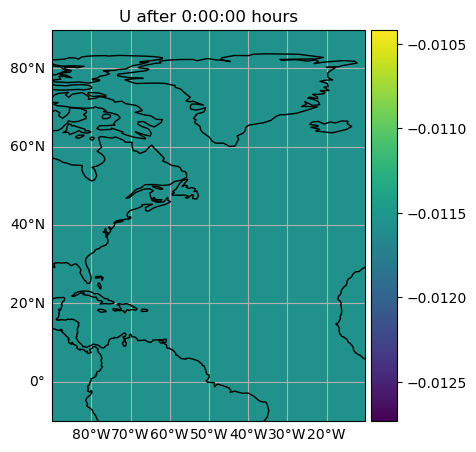

In [3]:
###Create fieldsets
U_val = -1/(24*3.6) #m/s

U = U_val*grid
V = 0*grid
data = {'U': U, 'V': V}
dimensions = {'lon': longitudes, 'lat': latitudes}
fieldset_1 = FieldSet.from_data(data, dimensions, mesh = "spherical")

fieldset_1.U.show()

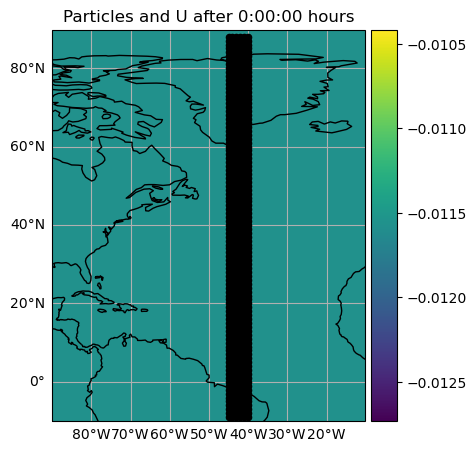

In [4]:
###Create particleset
lon_list = []
lat_list = []
for lon in range(-45,-39):
    for lat in range(-9,89):
        lon_list.append(lon)
        lat_list.append(lat)

pset = ParticleSet.from_list(fieldset=fieldset_1,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=lon_list,    # a vector of release longitudes 
                             lat=lat_list)    # a vector of release latitudes
pset.show(field=fieldset_1.U, show_time = 0)

In [5]:
###Execution of particleset
def run_1_1():
    T = 2 #days
    RK4_dt = 1 #minutes
    output_dt = 24 #hours
    output_file = pset.ParticleFile(name="Output_1_1.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_1_5():
    T = 2 #days
    RK4_dt = 5 #minutes
    output_dt = 24 #hours
    output_file = pset.ParticleFile(name="Output_1_5.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

def run_1_30():
    T = 2 #days
    RK4_dt = 30 #minutes
    output_dt = 24 #hours
    output_file = pset.ParticleFile(name="Output_1_30.zarr", outputdt=timedelta(hours=output_dt)) # the file name and the time step of the outputs
    pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
                 runtime=timedelta(days=T),    # the total length of the run
                 dt=timedelta(minutes=RK4_dt),      # the timestep of the kernel
                 output_file=output_file)
    
    return

run_1_1()
run_1_5()
run_1_30()

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> C:\Users\LUUKRA~1\AppData\Local\Temp\parcels-tmp\lib22bb3f8720a22d315e02385e1ed0b510_0.dll


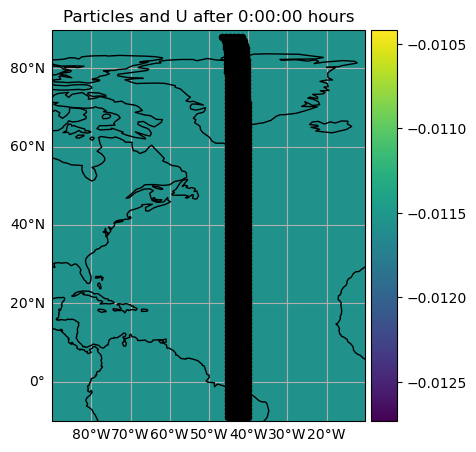

In [6]:
pset.show(field=fieldset_1.U, show_time = 0)

In [7]:
###Create xarray of output data
output_data_1 = xr.open_zarr("Output_1_1.zarr")
output_data_5 = xr.open_zarr("Output_1_5.zarr")
output_data_30 = xr.open_zarr("Output_1_30.zarr")

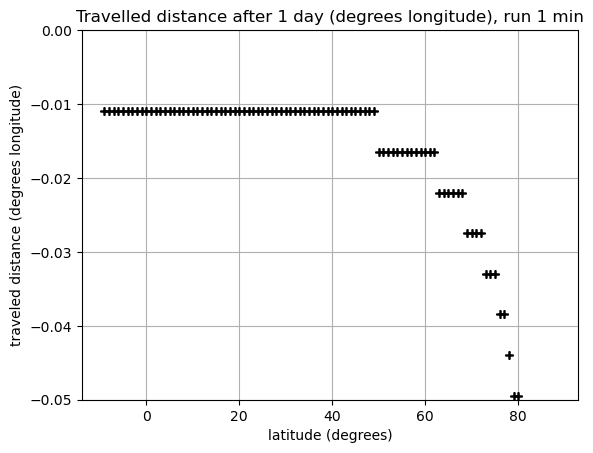

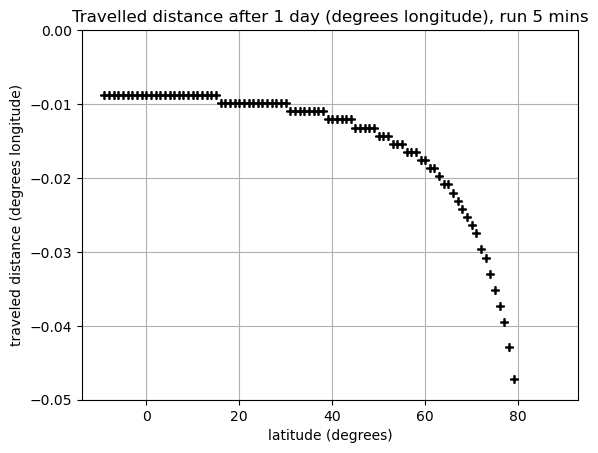

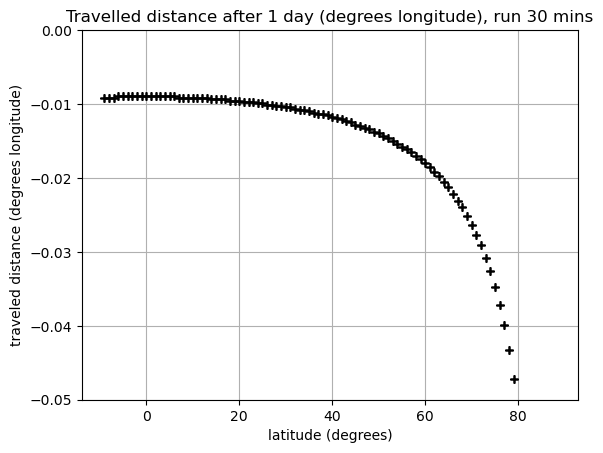

In [8]:
###Compute distance that particles travelled after 1 day and plot
distance_degrees_1 = np.diff(np.array(output_data_1['lon']))
plt.plot(output_data_1['lat'][:,0],distance_degrees_1[:,0],'+',c = 'k')
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (degrees longitude)")
plt.ylim(-0.05,0)
plt.title("Travelled distance after 1 day (degrees longitude), run 1 min")
plt.grid()
plt.show()

distance_degrees_5 = np.diff(np.array(output_data_5['lon']))
plt.plot(output_data_5['lat'][:,0],distance_degrees_5[:,0],'+',c = 'k')
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (degrees longitude)")
plt.ylim(-0.05,0)
plt.title("Travelled distance after 1 day (degrees longitude), run 5 mins")
plt.grid()
plt.show()

distance_degrees_30 = np.diff(np.array(output_data_30['lon']))
plt.plot(output_data_30['lat'][:,0],distance_degrees_30[:,0],'+',c = 'k')
plt.xlabel("latitude (degrees)")
plt.ylabel("traveled distance (degrees longitude)")
plt.ylim(-0.05,0)
plt.title("Travelled distance after 1 day (degrees longitude), run 30 mins")
plt.grid()
plt.show()

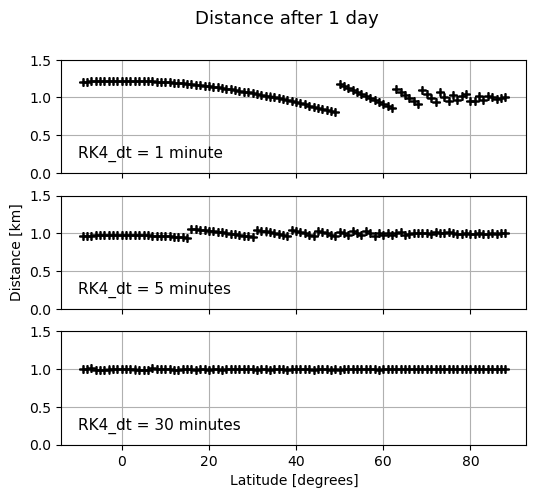

In [9]:
###Convert travelled distance from degrees to kilometres and plot
R_earth = 6371 #km
meter_per_degree_x = np.cos(np.array(output_data_1['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_1['lon'].values*meter_per_degree_x
y = output_data_1['lat'].values*meter_per_degree_y
distance_1 = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

meter_per_degree_x = np.cos(np.array(output_data_5['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_5['lon'].values*meter_per_degree_x
y = output_data_5['lat'].values*meter_per_degree_y
distance_5= np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

meter_per_degree_x = np.cos(np.array(output_data_30['lat'].values)*np.pi/180)*R_earth*2*np.pi/360
meter_per_degree_y = np.pi*2*R_earth/360
x = output_data_30['lon'].values*meter_per_degree_x
y = output_data_30['lat'].values*meter_per_degree_y
distance_30 = np.cumsum(np.sqrt(np.square(np.diff(x))+np.square(np.diff(y))),axis=1)

fig,ax=plt.subplots(3, sharex = True, sharey= True, figsize = (6,5))
fig.suptitle("Distance after 1 day", fontsize = 13)
ax[0].plot(output_data_1["lat"][:,0], distance_1[:,0],"+", c = "k")
ax[1].plot(output_data_5["lat"][:,0], distance_5[:,0],"+", c = "k")
ax[1].set(ylabel = "Distance [km]", ylim = (0,1.5))
ax[2].plot(output_data_30["lat"][:,0], distance_30[:,0],"+", c = "k")
ax[2].set(xlabel = "Latitude [degrees]")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].text(-10,0.2, "RK4_dt = 1 minute", fontsize = 11)
ax[1].text(-10,0.2, "RK4_dt = 5 minutes", fontsize = 11)
ax[2].text(-10,0.2, "RK4_dt = 30 minutes", fontsize = 11)
plt.savefig("North-Atlantic_zonal")
plt.show()